# ***FROM RAW DATA TO THE BEST MODEL***


Raw Data → Data Processing ---Data cleaning--→ Data Preprocessing ---Good data--→ Model Training → Evaluation → Deployment



<figure align="center">
    <img src="./assets/images/ml_pipeline.jpg">
</figure>


<figure align="center">
    <img src="./assets/images/ml_pipeline_endtoend.webp">
</figure>


<figure align="center">
    <img src="./assets/images/table_summarize_pre_model.png">
</figure>

In [153]:
# load dataset Pima_Indians_Diabetes in scikit-learn
import pandas as pd     # for handle dataset
import numpy as np      # math, numeric operate
import matplotlib.pyplot as plt     # draw, plot   
import seaborn as sns               # draw, plot with color

from sklearn import preprocessing as skl_pre
from sklearn import linear_model as skl_linmodel
from sklearn import feature_selection as skl_f_select


import os
from pathlib import Path


# **1. EDA - Exploratory Data Analysis**

- `EDA` is a process for `summarising`, `visualising`, and 
becoming `intimately familiar` with the `important characteristics` of the data

> Tell story about the data

## **1.1 Lecture**

### **1.1.1 4 Objectives of EDA**

1. Discover pattern 
2. Spot anomalies
3. Frame hypothesis
4. Check hypothesis

### **1.1.2 Stuff in EDA**

- Central tendency: `mean`, `median`, `mode`
- Spreed: `standard deviation` & `variance`
- Shape of distribution: distribution, trend
- `Outlier`
- `Correlations`

<figure align="center">
    <img src="./assets/images/eda_uni-multi_non-grapical.png">
</figure>


- Visualization 


<figure align="center">
    <img src="./assets/images/eda_visualization_thought.png">
</figure>




## **1.2 Practice**

### **1.2.1 Load dataset**

For Each Attribute: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

In [103]:
# load dataset Pima_Indians_Diabetes in from sklearn.datasets import load_diabetes
# /home/nii/Documents/SGU_2025_ML-Fundamentals/dataset/diabetes.csv
path_dataset = Path.cwd().resolve().joinpath("./dataset/diabetes.csv")
print(path_dataset)

/home/nii/Documents/SGU_2025_ML-Fundamentals/dataset/diabetes.csv


In [104]:
# Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
names = ['preg', 'gluc', 'pres', 'skin', 'insu', 'bmi', 'pedi', 'age', 'class']
data = pd.read_csv(path_dataset, names=names)


### **1.2.2 Descriptive Statistics - Non graphical**

    - Peek At Your Data
    - Dimensions of Your Data.
    - Data Types.
    - Class Distribution.
    - Data Summary.
    - Correlations.
    - Skewness.

#### Peek - head and tail

In [105]:
data.head()

,preg,gluc,pres,skin,insu,bmi,pedi,age,class
0,6,148,72,35,0,33.6000,0.6270,50,1
1,1,85,66,29,0,26.6000,0.3510,31,0
2,8,183,64,0,0,23.3000,0.6720,32,1
3,1,89,66,23,94,28.1000,0.1670,21,0
4,0,137,40,35,168,43.1000,2.2880,33,1


In [106]:
data.tail()

,preg,gluc,pres,skin,insu,bmi,pedi,age,class
763,10,101,76,48,180,32.9000,0.1710,63,0
764,2,122,70,27,0,36.8000,0.3400,27,0
765,5,121,72,23,112,26.2000,0.2450,30,0
766,1,126,60,0,0,30.1000,0.3490,47,1
767,1,93,70,31,0,30.4000,0.3150,23,0


- Comment: 
    + The data has 8 attributes (cols) & class [0, 1]
    + Data has lots of 0 values
    + Vastly different scale: range of values of all attributes differs significantly 


#### From comment, show all row have values 0

In [107]:
# (data == 0.0) : check in all data, which values == 0.0   => return Boolean matrix
# .any(axis=1)  : get all row 
data_zero = data[(data[['preg', 'gluc', 'pres', 'skin', 'insu', 'bmi', 'pedi', 'age']] == 0.0).any(axis=1)]
data_zero

,preg,gluc,pres,skin,insu,bmi,pedi,age,class
0,6,148,72,35,0,33.6000,0.6270,50,1
1,1,85,66,29,0,26.6000,0.3510,31,0
2,8,183,64,0,0,23.3000,0.6720,32,1
4,0,137,40,35,168,43.1000,2.2880,33,1
5,5,116,74,0,0,25.6000,0.2010,30,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0000,0.4030,43,1
762,9,89,62,0,0,22.5000,0.1420,33,0
764,2,122,70,27,0,36.8000,0.3400,27,0
766,1,126,60,0,0,30.1000,0.3490,47,1


&rarr; In data, we have 432 rows which have 0 values (except 'class')

#### Dimensions

In [108]:
data.shape

(768, 9)

#### Data types

In [109]:
data.dtypes

preg       int64
gluc       int64
pres       int64
skin       int64
insu       int64
bmi      float64
pedi     float64
age        int64
class      int64
dtype: object

#### Check for missing data

In [110]:
data.isna().sum()

preg     0
gluc     0
pres     0
skin     0
insu     0
bmi      0
pedi     0
age      0
class    0
dtype: int64

- Comment: 
    + Data don't have any missing value

#### Description of data

In [ ]:
# Set precision to 4 decimal places:
pd.options.display.float_format = '{:.4f}'.format

description = data.describe()
description

,preg,gluc,pres,skin,insu,bmi,pedi,age,class
count,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000
mean,3.8451,120.8945,69.1055,20.5365,79.7995,31.9926,0.4719,33.2409,0.3490
std,3.3696,31.9726,19.3558,15.9522,115.2440,7.8842,0.3313,11.7602,0.4770
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0780,21.0000,0.0000
25%,1.0000,99.0000,62.0000,0.0000,0.0000,27.3000,0.2437,24.0000,0.0000
50%,3.0000,117.0000,72.0000,23.0000,30.5000,32.0000,0.3725,29.0000,0.0000
75%,6.0000,140.2500,80.0000,32.0000,127.2500,36.6000,0.6262,41.0000,1.0000
max,17.0000,199.0000,122.0000,99.0000,846.0000,67.1000,2.4200,81.0000,1.0000


- Comment:
    + All comment above are true, and
    + Some features like 'insu' & 'gluc' have big *std* &rarr; multiple discrete values

### **1.2.3 Visualization - graphical**

#### a.Are the classes balanced?

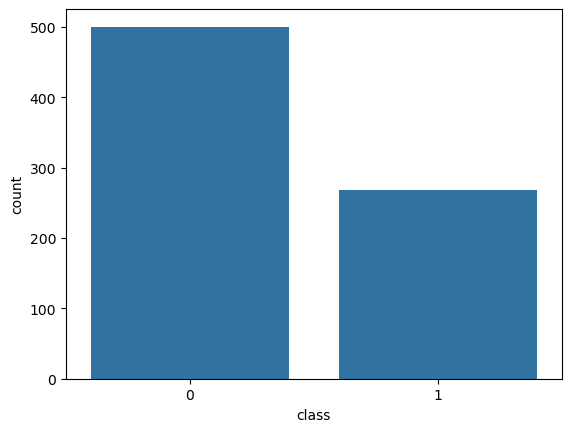

In [112]:
class_count = data['class'].value_counts()

# Matplotlib:
# plt.bar(class_count.index, class_count.values)

# Seaborn:
sns.countplot(x=data['class']);

- Comment:
    + The number of class 0 is *almost double* the number of class 1

#### b. Are all attributes have correlations?

In [113]:
data_corr = data.corr(method='pearson')
data_corr

,preg,gluc,pres,skin,insu,bmi,pedi,age,class
preg,1.0000,0.1295,0.1413,-0.0817,-0.0735,0.0177,-0.0335,0.5443,0.2219
gluc,0.1295,1.0000,0.1526,0.0573,0.3314,0.2211,0.1373,0.2635,0.4666
pres,0.1413,0.1526,1.0000,0.2074,0.0889,0.2818,0.0413,0.2395,0.0651
skin,-0.0817,0.0573,0.2074,1.0000,0.4368,0.3926,0.1839,-0.1140,0.0748
insu,-0.0735,0.3314,0.0889,0.4368,1.0000,0.1979,0.1851,-0.0422,0.1305
bmi,0.0177,0.2211,0.2818,0.3926,0.1979,1.0000,0.1406,0.0362,0.2927
pedi,-0.0335,0.1373,0.0413,0.1839,0.1851,0.1406,1.0000,0.0336,0.1738
age,0.5443,0.2635,0.2395,-0.1140,-0.0422,0.0362,0.0336,1.0000,0.2384
class,0.2219,0.4666,0.0651,0.0748,0.1305,0.2927,0.1738,0.2384,1.0000


- So, visualize with *heatmap*

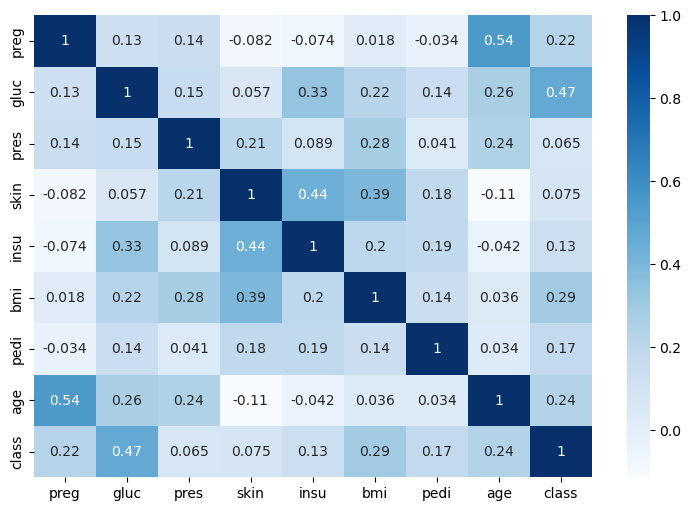

In [ ]:
plt.figure(figsize=(9, 6))
sns.heatmap(data_corr, annot=True, cmap='Blues')
plt.show()

&rarr; little strong correlation between: 

- *age & preg* - 0.54
- *insu & skin* - 0.44
- and **gluc & class** - 0.47
        

#### c. Skewness and Kurtosis - univariate distribution

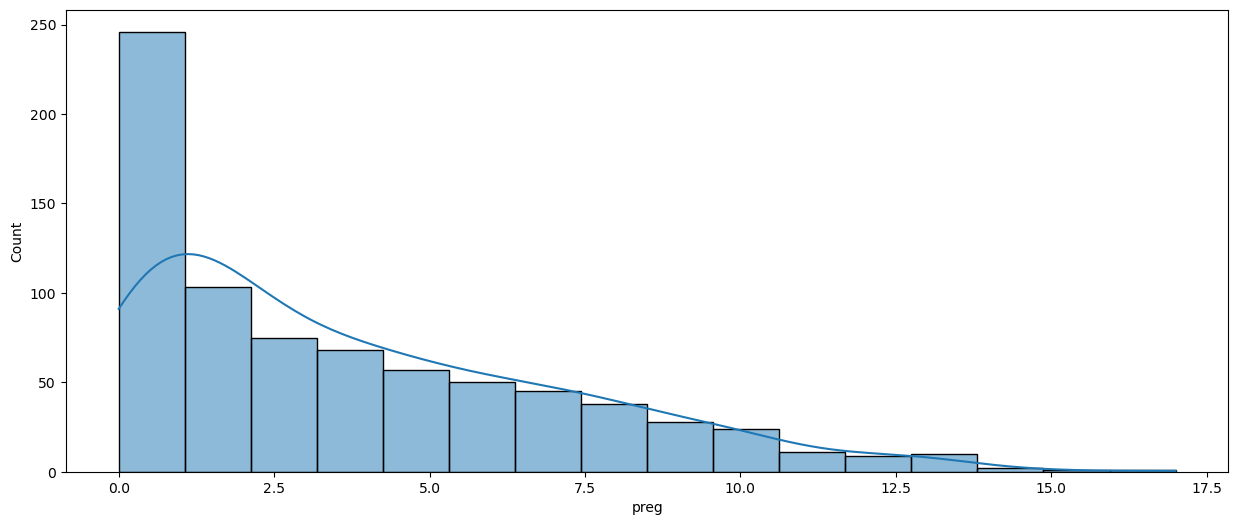

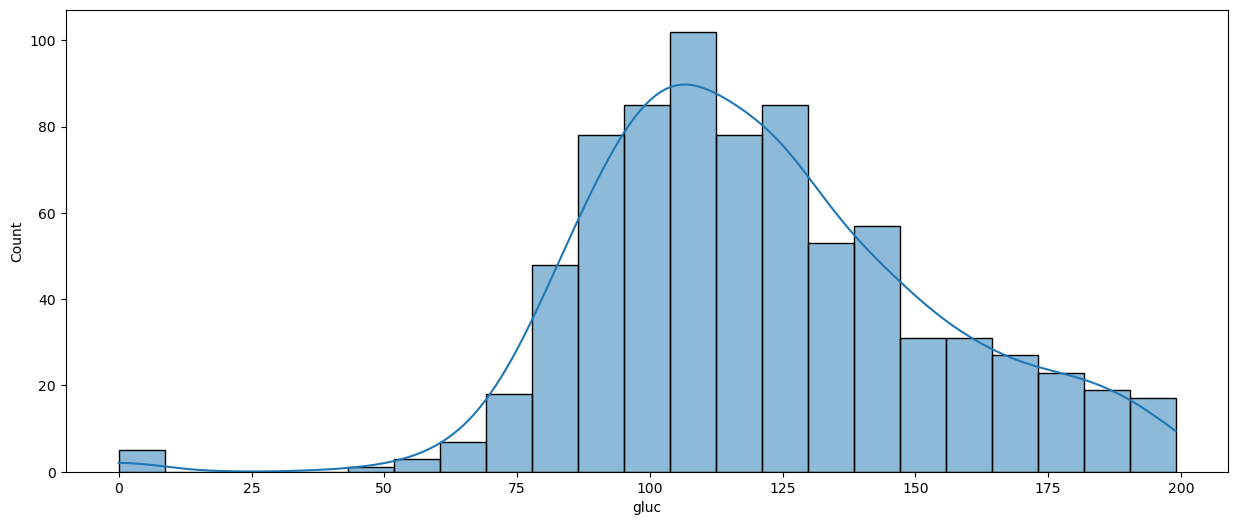

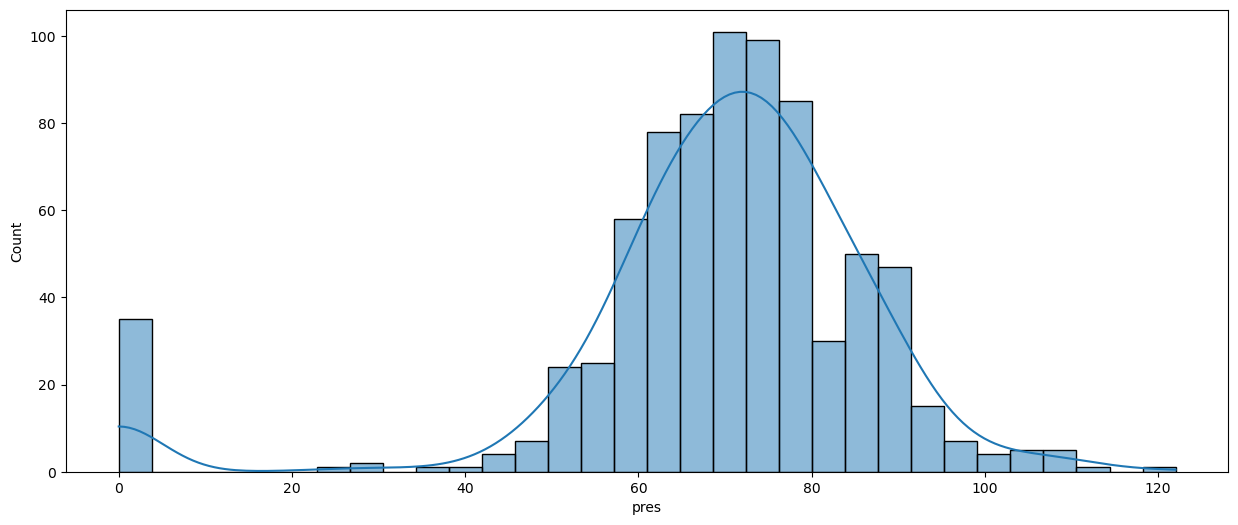

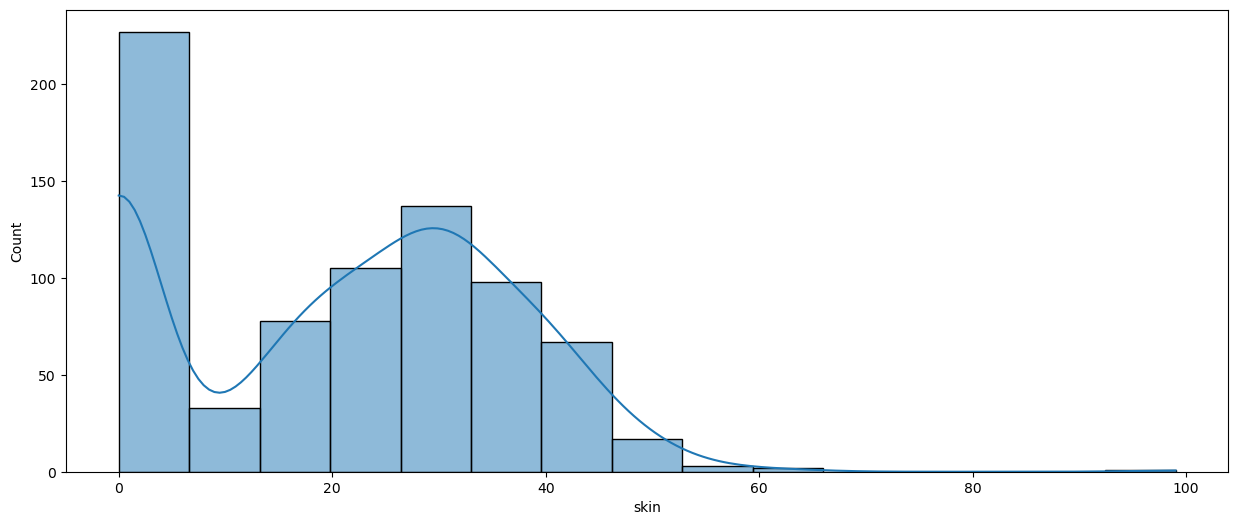

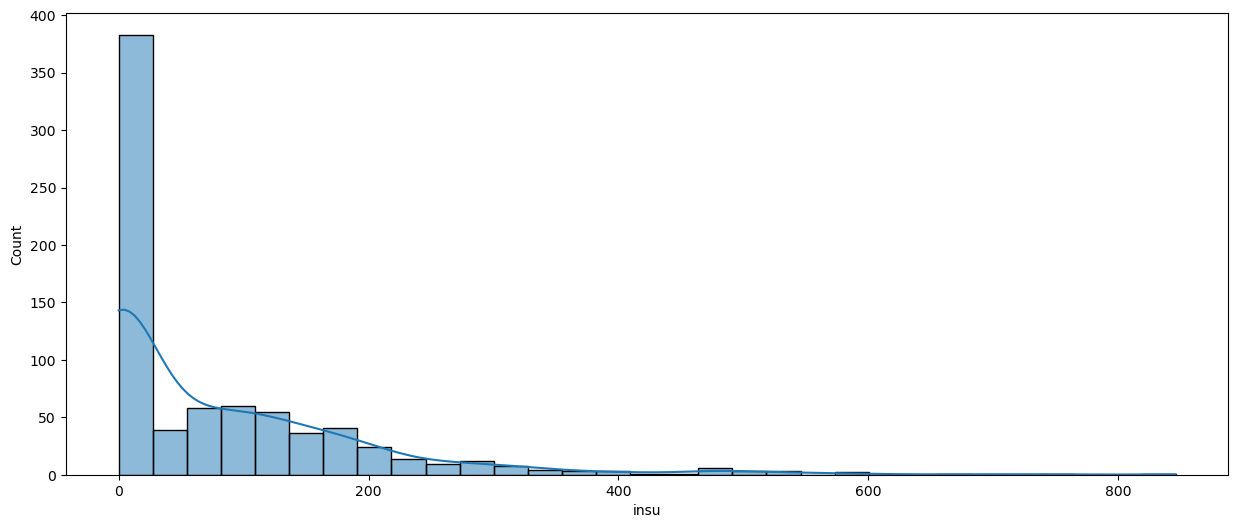

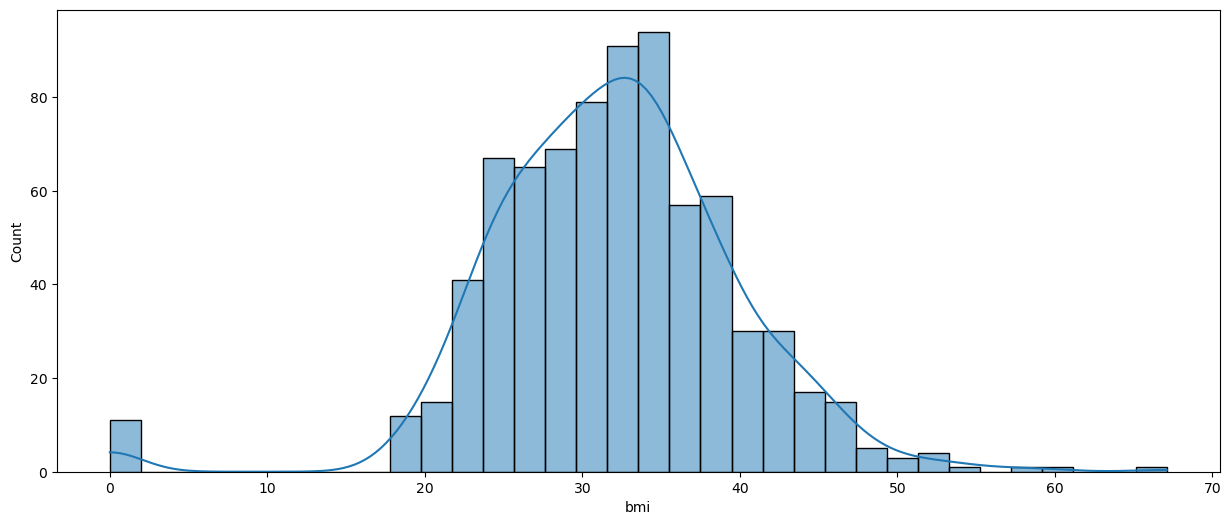

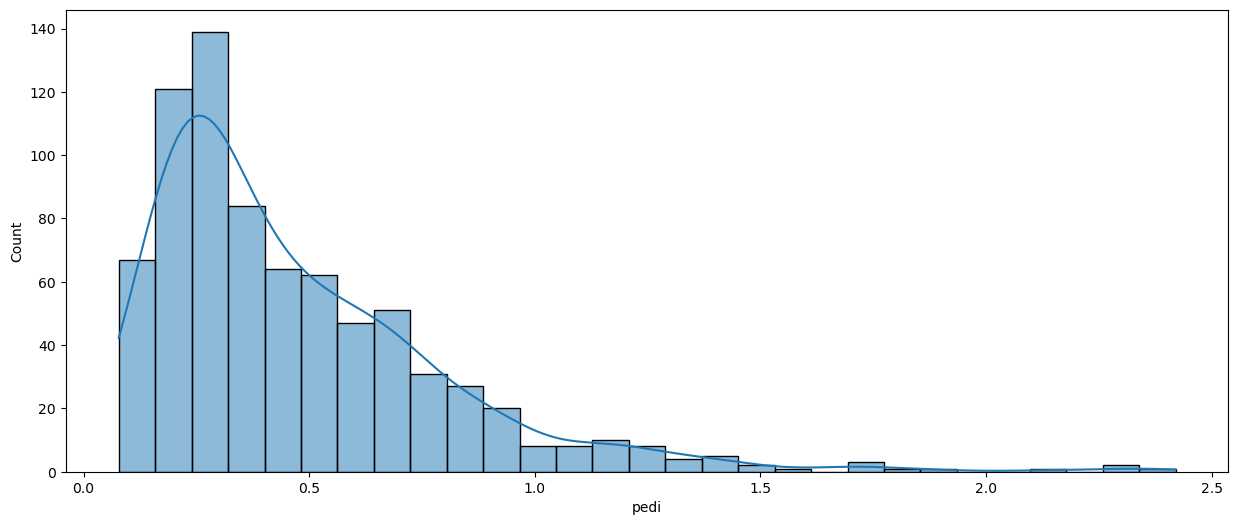

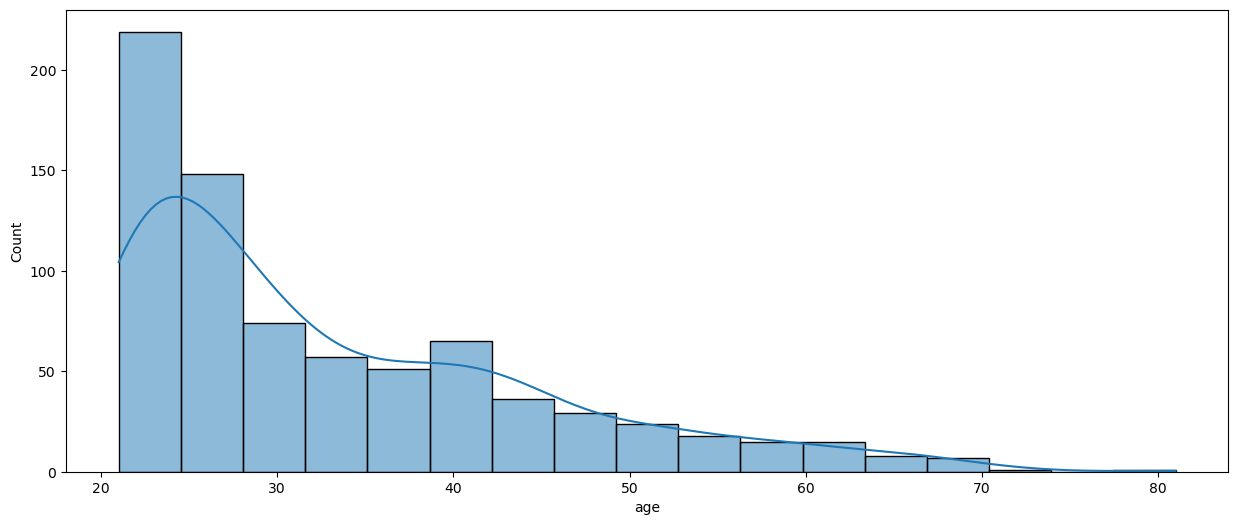

In [115]:
names_attr = ['preg', 'gluc', 'pres', 'skin', 'insu', 'bmi', 'pedi', 'age']
for attr in names_attr:
    plt.figure(figsize=(15, 6))
    sns.histplot(data[attr], kde=True)
    plt.show()

- Comments (in distribution of 'preg' - right-skewed):
    + Most women had 0-2 pregnancies
    + Some *outlier* woman had very high pregnancy counts

&rarr; Not normal distribution, so reduce Linear Regression model effectiveness 

&rarr; Need: transformation

#### d. Univariate plots

##### Histogram

- frequency of numeric by splitting values to small equal-size bins

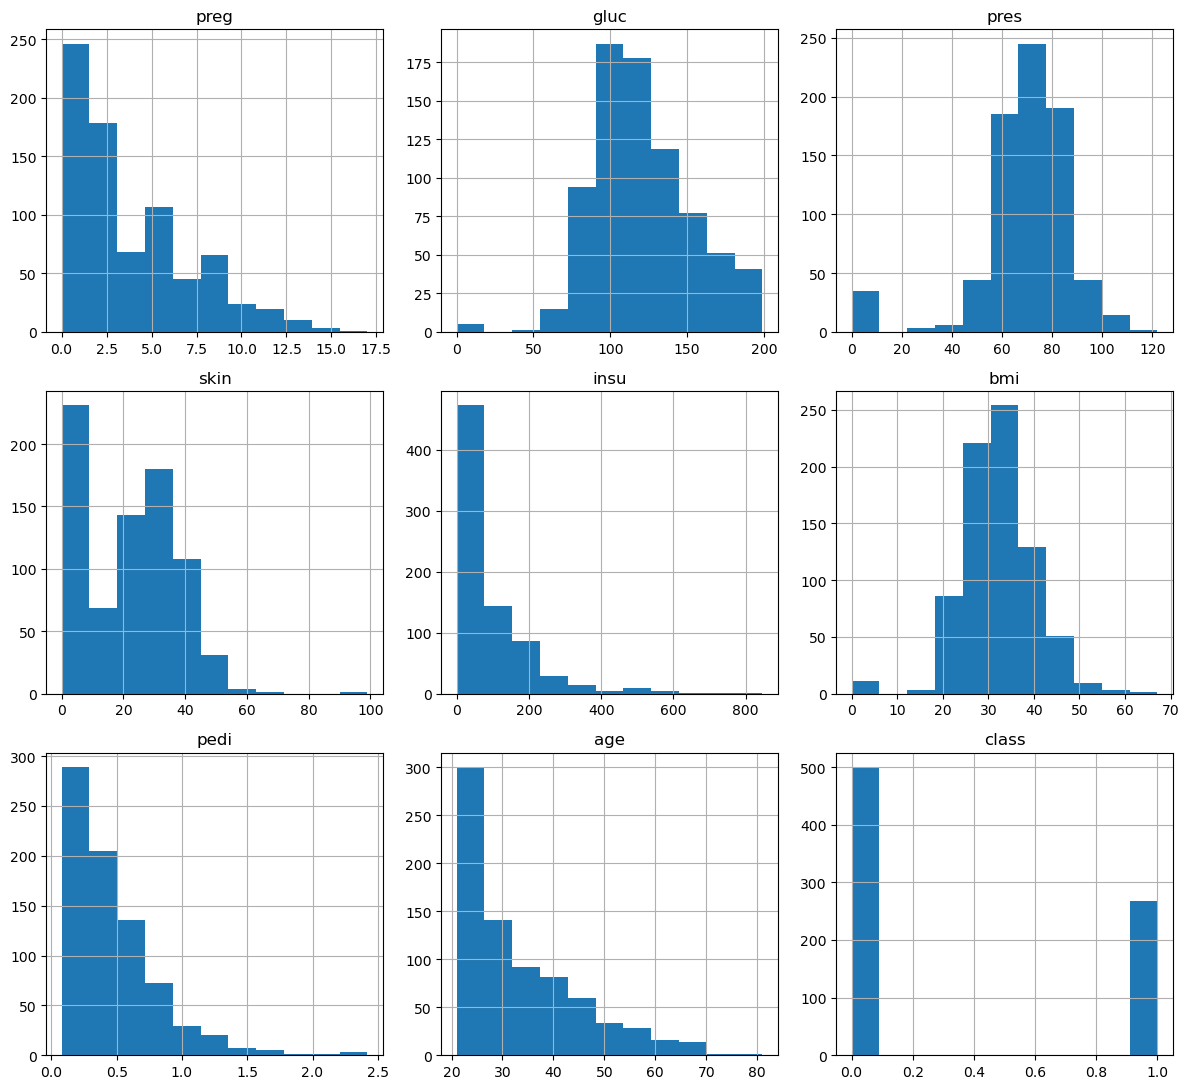

In [116]:
ax = data.hist(figsize=(12, 11), bins=11, layout=(3, 3))
plt.tight_layout()      # auto adjust space between subplots
plt.show()

##### Density: another way to visualize distribution

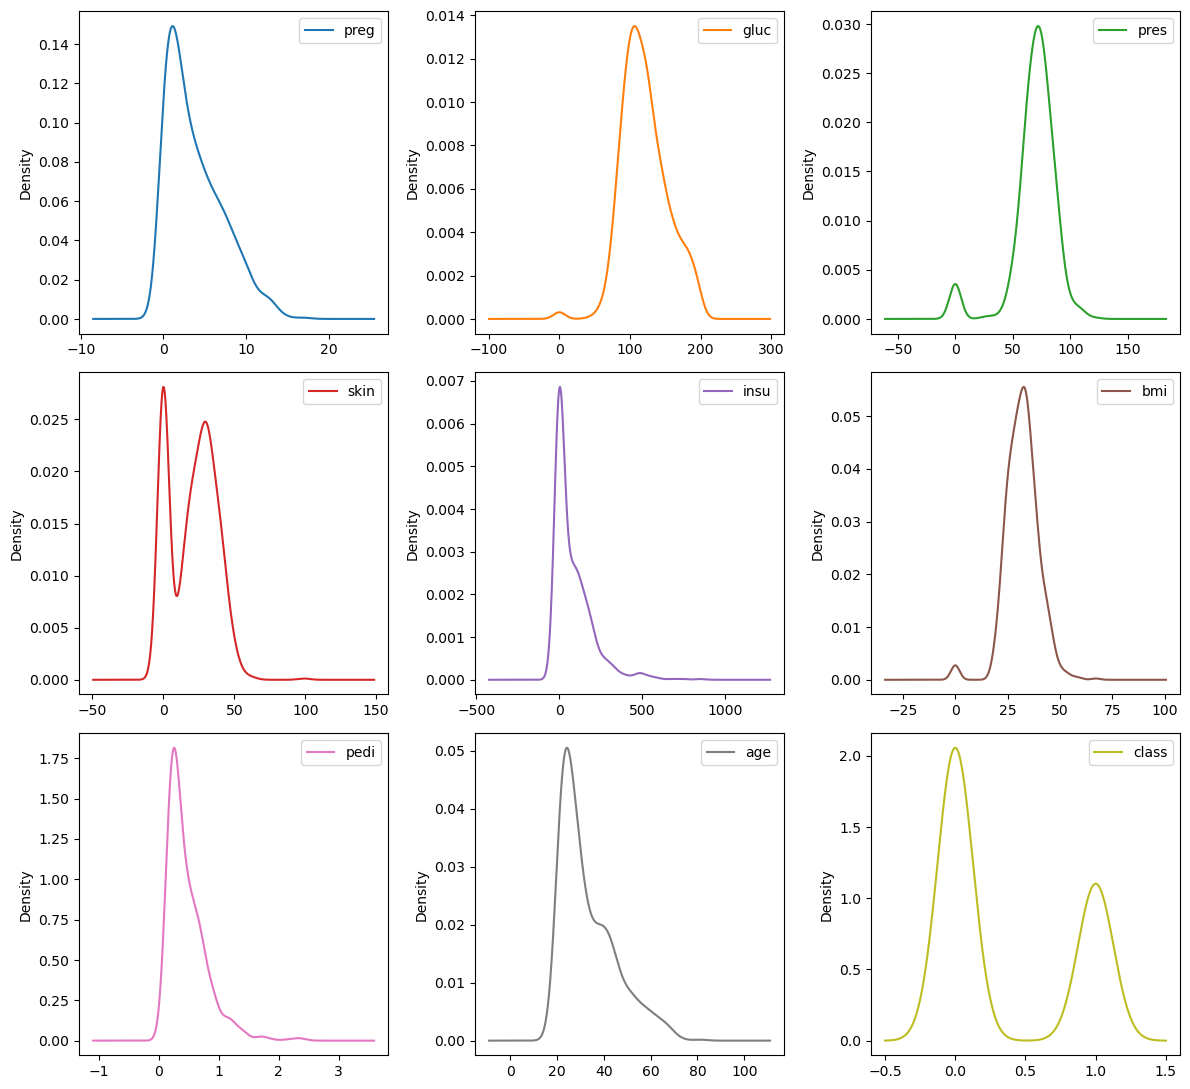

In [117]:
ax = data.plot(kind='density', subplots=True, sharex=False, figsize=(12, 11), layout=(3,3))
plt.tight_layout()
plt.show()

- Comment:
    + *gluc, pres & bmi* have approximately *Gaussian Distribution* ( Normal distribution, mu - sigma)
    + *preg, insu, pedi & age* have exponential distribution

##### Box - Whisker plot

- Summarize the distribution, draw line for:
    + median
    + 25th & 75th percentiles  

- Give us idea: *spread* of the data | *outlier*
    + *outlier*: values that are 1.5 times greater than the size of spread of the middle 50% of the data.

<figure>
    <div align="center">
        <img src="./assets/images/boxplot_explaination.png">
    </div>

</figure>

- Example for boxplot

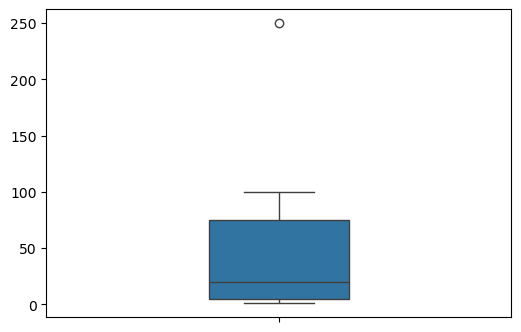

In [118]:
data_test_box = [1, 3, 7, 20, 50, 100, 250]
# data_test_box = [25, 28, 29, 29, 30, 34, 35, 35, 37, 38, 50]
# Vẽ boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(y=data_test_box, width=0.3);

&rarr; '250' - outlier

- Boxplot using matplotlib, orient: vertical

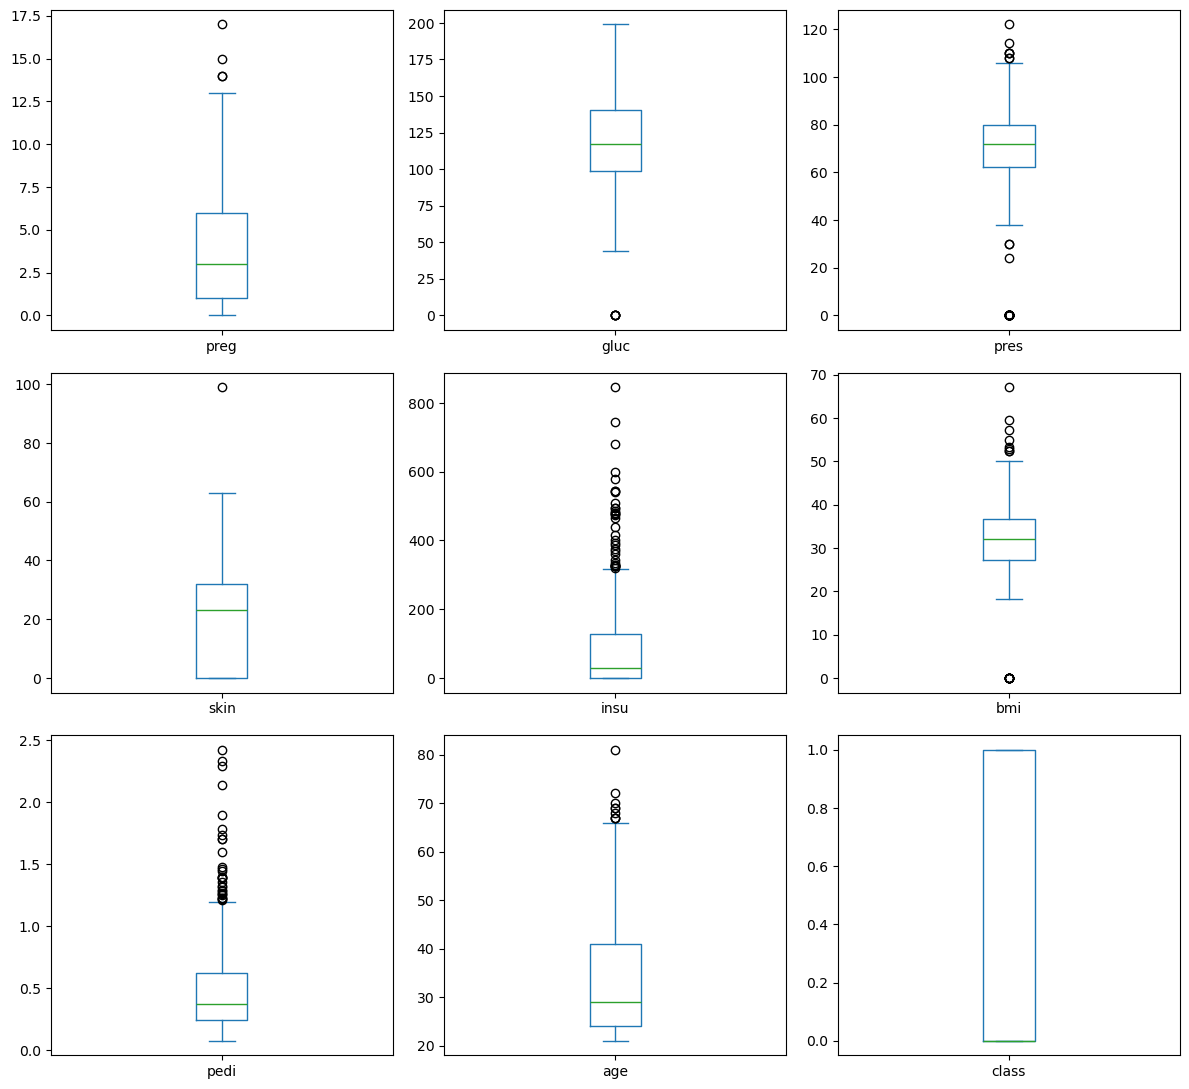

In [119]:
data.plot(figsize=(12, 11), kind='box', subplots=True, layout=(3, 3), sharex=False)
plt.tight_layout()
plt.show()

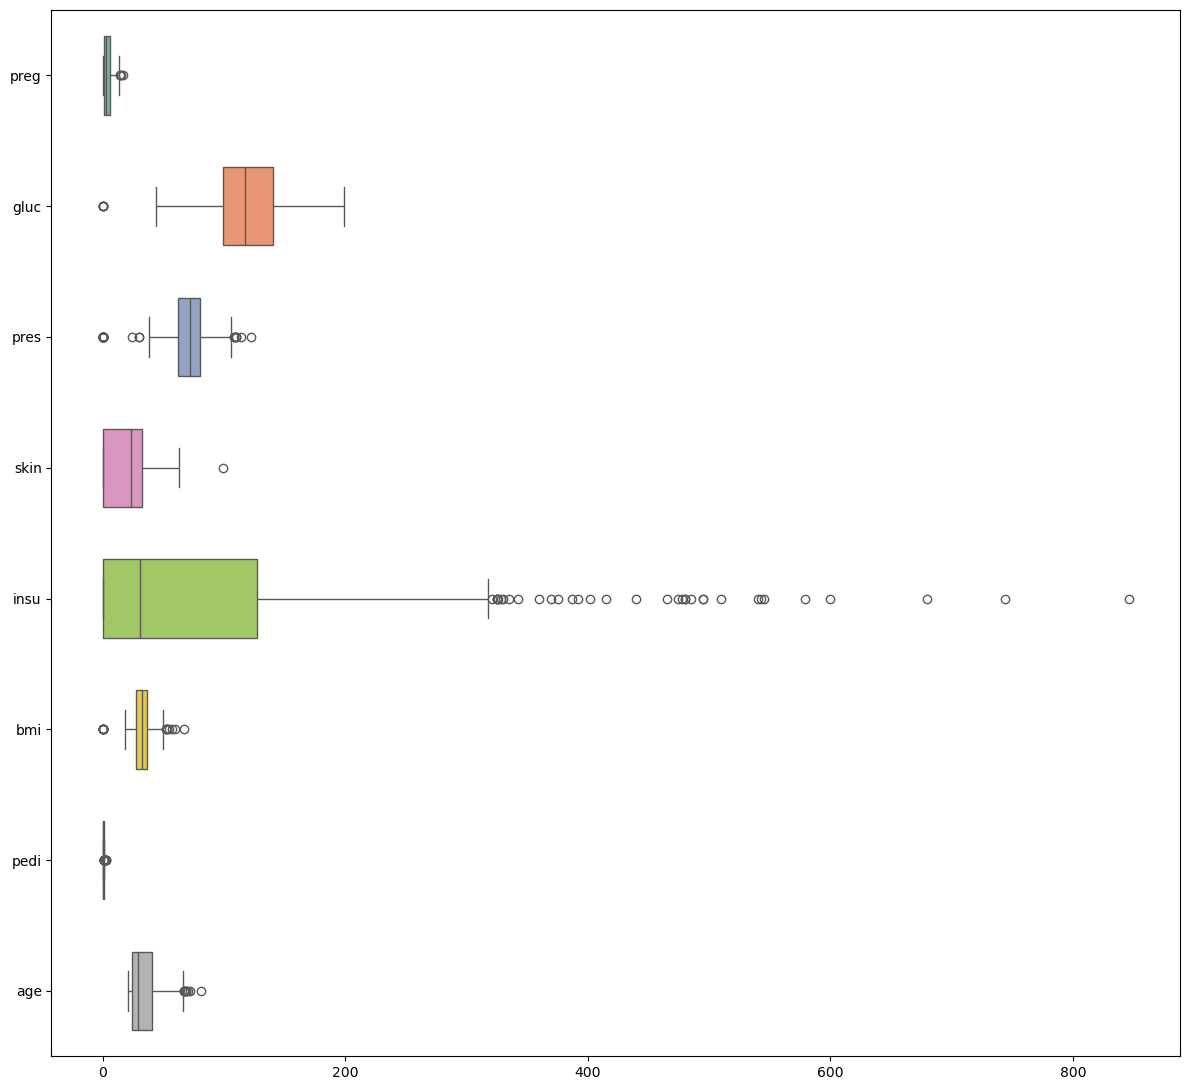

In [120]:
# boxplot for all attributes using seaborn
plt.figure(figsize=(12, 11))
# sns.boxplot(data=data, orient='h', palette='Set2', width=0.6);
sns.boxplot(data=data[names_attr], orient='h', palette='Set2', width=0.6);
plt.tight_layout()
plt.show()

- Comment:
    + '*insu*' has a lot of *outlier* from 300 &rarr; 900

#### e. Multivariate plots

##### Correlation matrix plot

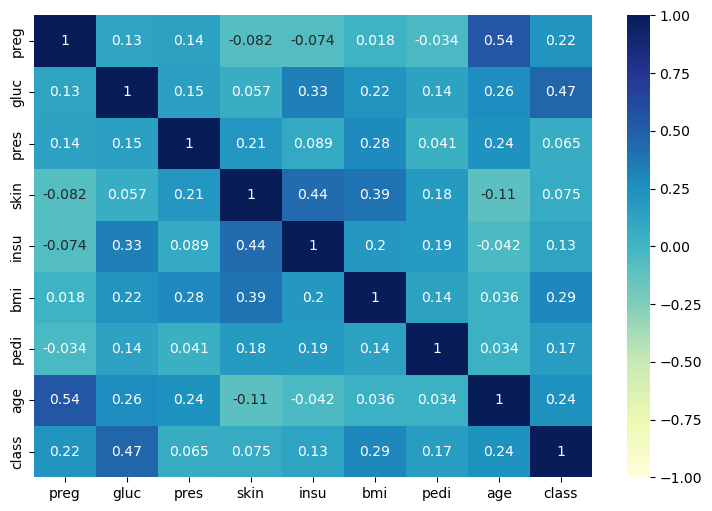

In [121]:
plt.figure(figsize=(9, 6))
# cmap: viridis, plasma, inferno, magma, rocket, mako, flare, crest | 
#       Greys, Reds, Blues, Greens, Oranges, Purples |
#       YlGnBu, BuGn, PuBuGn, YlOrRd
sns.heatmap(data_corr, annot=True, vmin=-1, vmax=1, cmap="YlGnBu")
plt.show()

##### Scatter matrix plot

<Figure size 2000x1200 with 0 Axes>

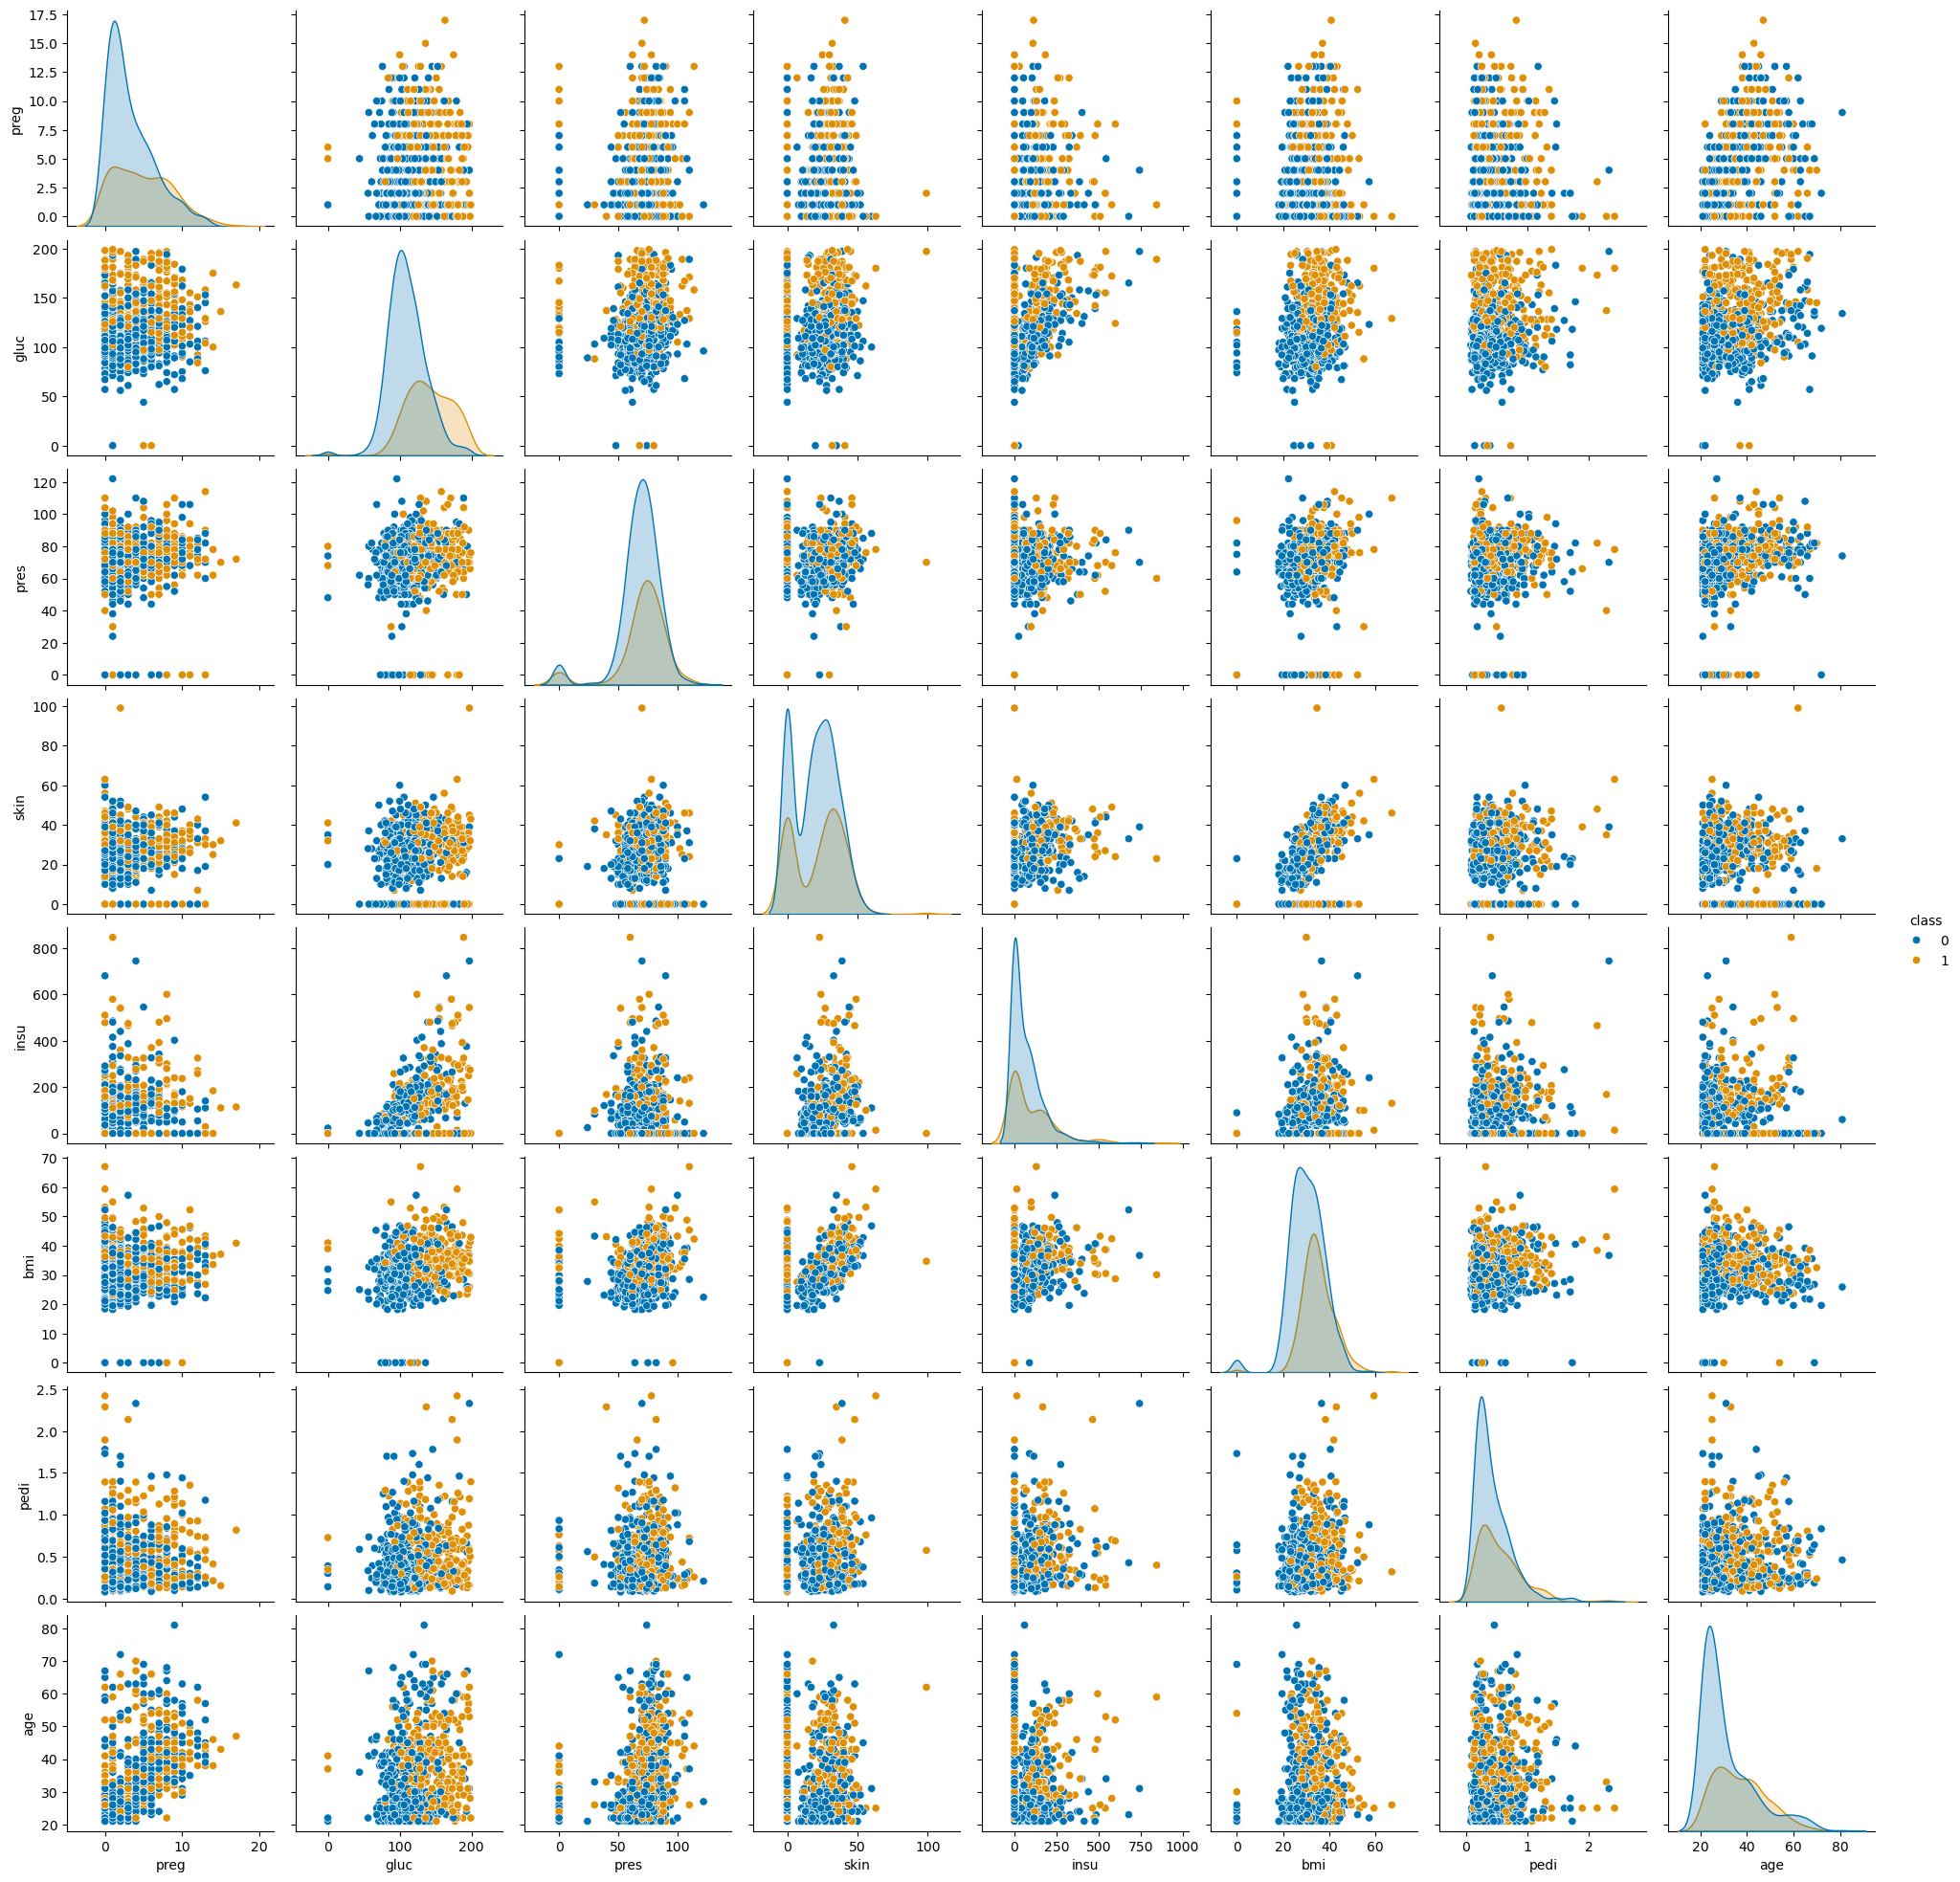

In [122]:
plt.figure(figsize=(20, 12))
# palette: deep, muted, bright, pastel, dark, colorblind | Set1, Set2, Set3
sns.pairplot(data, hue='class', palette='colorblind')
# sns.pairplot(data)
plt.show();

# **2. Data pre-processing & preparation for model**

## **2.1 Why we need to preprocessing and preparation data?**

- Data in the real world:
    + *In complete*: missing, unreasonable values
    + *Inconsistent*: “03/07/2015”, “March 07, 2015”
    + *Noisy*: errors/outliers
    + *Large-scale/big data*: large number of features and instances
    + *Different type*: numeric, nominal, text, Web data, images, audio/video

- Different *model* requires different *data formats*
- Only use a part of data/all data ?



## **2.2 Preprocessing tasks**

- *Data cleaning*: identify and correct mistakes (missing values, unreasonable values,...)
- *Data transforms*: change the scale of variables
- *Dimensionality reduction*: create compact projections of the data (phép chiếu &rarr; cô đọng dữ liệu)
- *Feature selection*: identify relevant input vars (have correlation with output)
- *Feature construction*: derive (create) new vars from available data

## **2.3 Data leakage**
A test dataset leaks into data used to train the model

- True way: `Data splitting` &rarr; `Data preparation` &rarr; `Modelling`

> Good model &harr; Generalisation 

## **2.4 Data cleaning**

### **2.4.1 Remove duplication**

#### a. Check for duplicated samples

In [123]:
# Get all duplicated samples (include the first occurrence)
data_dup = data[data.duplicated(keep=False)]
# Get all duplicated samples (exclude the first occurrence)
data_dup = data[data.duplicated(keep='first')]

print(data_dup)

Empty DataFrame
Columns: [preg, gluc, pres, skin, insu, bmi, pedi, age, class]
Index: []


- Comment: data don't has any duplicated samples

#### b. Drop specific rows, columns

In [124]:
data_copy = data.copy()
# Drop all duplicated samples (keep the first occurrence)
data_copy.drop_duplicates(keep='first', inplace=True)

# Drop specific rows by index
data_copy_drop_rows = data_copy.drop(index=[0, 1, 2])   # drop rows which index = 0, 1, 2
# Drop specific columns by name
data_copy_drop_cols = data_copy.drop(columns=['preg', 'age'])   # drop columns
# Or drop using labels and axis
# data_copy_drop_cols = data_copy.drop(labels=['preg', 'age'], axis=1
# data_copy_drop_rows = data_copy.drop(labels=[0, 1, 2], axis=0)

data_copy_drop_rows.head()
# data_copy_drop_cols.head()

,preg,gluc,pres,skin,insu,bmi,pedi,age,class
3,1,89,66,23,94,28.1000,0.1670,21,0
4,0,137,40,35,168,43.1000,2.2880,33,1
5,5,116,74,0,0,25.6000,0.2010,30,0
6,3,78,50,32,88,31.0000,0.2480,26,1
7,10,115,0,0,0,35.3000,0.1340,29,0


### **2.4.2 Change values of data (can use for handle missing values)**

- Replace values with `assign()` &rarr; return new DF

In [125]:
# Replace all 0 values in 'gluc', 'pres', 'insu', 'skin' & 'bmi' columns -> 'mean' of the respective columns
data_new = data_copy_drop_cols.assign(gluc=lambda x: x.gluc.replace(0, x.gluc.mean()),
                                       pres=lambda x: x.pres.replace(0, x.pres.mean()),
                                       insu=lambda x: x.insu.replace(0, x.insu.mean()),
                                       skin=lambda x: x.skin.replace(0, x.skin.mean()),
                                       bmi=lambda x: x.bmi.replace(0, x.bmi.mean()),
                                       )

data_new.head()


,gluc,pres,skin,insu,bmi,pedi,class
0,148.0000,72.0000,35.0000,79.7995,33.6000,0.6270,1
1,85.0000,66.0000,29.0000,79.7995,26.6000,0.3510,0
2,183.0000,64.0000,20.5365,79.7995,23.3000,0.6720,1
3,89.0000,66.0000,23.0000,94.0000,28.1000,0.1670,0
4,137.0000,40.0000,35.0000,168.0000,43.1000,2.2880,1


- Replace with condition:  `df.mask(condition, value)`

In [126]:
data_new_cond = data_copy_drop_cols.mask((data_copy_drop_cols[['gluc', 'pres', 'insu', 'skin', 'bmi']] == 0.0),
                                        data_copy_drop_cols[['gluc', 'pres', 'insu', 'skin', 'bmi']].mean(), axis=1)
data_new_cond.head()

,gluc,pres,skin,insu,bmi,pedi,class
0,148.0000,72.0000,35.0000,79.7995,33.6000,NaN,NaN
1,85.0000,66.0000,29.0000,79.7995,26.6000,NaN,NaN
2,183.0000,64.0000,20.5365,79.7995,23.3000,NaN,NaN
3,89.0000,66.0000,23.0000,94.0000,28.1000,NaN,NaN
4,137.0000,40.0000,35.0000,168.0000,43.1000,NaN,NaN


- Replace with `replace()`

In [127]:
data_replace_class = data_copy_drop_cols.replace({'class': {0: 'No', 1: 'Yes'}})
data_replace_class.head()

,gluc,pres,skin,insu,bmi,pedi,class
0,148,72,35,0,33.6000,0.6270,Yes
1,85,66,29,0,26.6000,0.3510,No
2,183,64,0,0,23.3000,0.6720,Yes
3,89,66,23,94,28.1000,0.1670,No
4,137,40,35,168,43.1000,2.2880,Yes


In [128]:
# No missing -> have missing
data_missing = data_copy.copy()
data_missing['insu'] = data_missing['insu'].replace(0, np.nan).copy()

data_missing.head()

,preg,gluc,pres,skin,insu,bmi,pedi,age,class
0,6,148,72,35,NaN,33.6000,0.6270,50,1
1,1,85,66,29,NaN,26.6000,0.3510,31,0
2,8,183,64,0,NaN,23.3000,0.6720,32,1
3,1,89,66,23,94.0000,28.1000,0.1670,21,0
4,0,137,40,35,168.0000,43.1000,2.2880,33,1


### **2.4.2 Change dtype of columns**

In [129]:
# Change dtype of columns
data_dtypes = data_copy.astype({'preg': 'float64', 'gluc': 'float64', 'pres': 'float64', 'skin': 'float64',
                                'insu': 'float64', 'bmi': 'float64', 'pedi': 'float64', 'age': 'float64', 'class': 'float64'})
data_dtypes.dtypes

preg     float64
gluc     float64
pres     float64
skin     float64
insu     float64
bmi      float64
pedi     float64
age      float64
class    float64
dtype: object

### **2.4.3 Handle missing values**

#### a. Check and report missing values

- Missing report: *count* & *percent*

In [130]:
def missing_report(df):
    """
    Check and report missing values in DataFrame

    - Input: df - pandas DataFrame
    - Output: missing_report - pandas DataFrame with 2 columns: 'Count' & '
    """
    # isnull() & isna() are the same
    missing_count = df.isna().sum()
    missing_percent = df.isna().mean() * 100

    # Concat 2 Series above
    missing_report = pd.concat([missing_count, missing_percent], axis=1)
    missing_report.columns = ['Count', 'Percent']
    
    return missing_report

In [131]:
missing_report(data_missing)

,Count,Percent
preg,0,0.0000
gluc,0,0.0000
pres,0,0.0000
skin,0,0.0000
insu,374,48.6979
bmi,0,0.0000
pedi,0,0.0000
age,0,0.0000
class,0,0.0000


- Visualize with heatmap

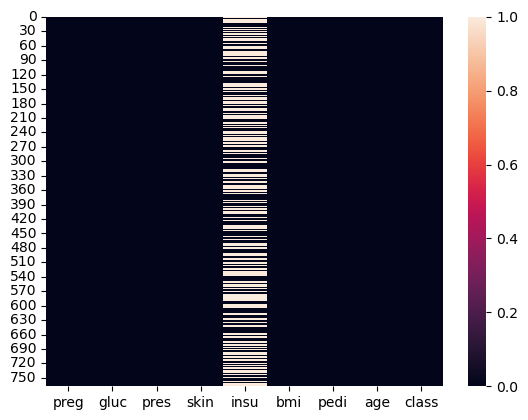

In [132]:
sns.heatmap(data_missing.isna());

#### b. Drop all samples(rows) have NaN values

In [133]:
### how: 'any' or 'all'
# 'any': drop row if any column has NaN value (only 1 column have NaN)
# 'all': drop row if all columns have NaN values (all columns are NaN)
### axis
# axis=0: drop rows; 
# axis=1: drop columns 
data_no_missing = data_missing.dropna(how='any')

missing_report(data_no_missing)

,Count,Percent
preg,0,0.0000
gluc,0,0.0000
pres,0,0.0000
skin,0,0.0000
insu,0,0.0000
bmi,0,0.0000
pedi,0,0.0000
age,0,0.0000
class,0,0.0000


## **2.5 Data preprocessing**

### **2.5.1 Encoding categorical data**
Convert categorical data &rarr; numeric value

#### a. One-hot encoding(Nominal): each unique value, new column is added 
Value in 'true column' &rarr; 1, value in 'false column' &rarr; 0


<figure align="center">
    <img src="./assets/images/data-processing_onehot-encoding.png">
</figure>


#### Ordinal encoding: assign integers to labels in certain order


<figure align="center">
    <img src="./assets/images/data-processing_ordinal-encoding.png" width="600px" height="300px">
</figure>


### **2.5.2 Scaling/Normalization/Standardization**

- **Normalization**: different variables &rarr; same range
- **Standardization**: centered around 0

So:
- `distribution is normal` &rarr; standardize >< otherwise &rarr; normalize
- Not sure &rarr; normalize


<figure align="center">
    <img src="./assets/images/data-processing_large-scale.png">
</figure>


In [134]:
data_arr = data.values

X = data_arr[:, 0:8]
Y = data_arr[:, 8]

#### 1️⃣ Rescale (Min–Max Scaling)

**Formula:**

$$
X' = \frac{X - X_{min}}{X_{max} - X_{min}}
$$

**Explanation:**  
- Scales the data to a **fixed range** (usually `[0, 1]` or `[-1, 1]`).  
- Preserves the **relative distribution** of values.  
- **Disadvantage:** Sensitive to **outliers**.


In [135]:
scaler_01 = skl_pre.MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler_01.fit_transform(X)

np.set_printoptions(precision=4)
print(X_rescaled[11:21, :])

[[0.5882 0.8442 0.6066 0.     0.     0.5663 0.196  0.2167]
 [0.5882 0.6985 0.6557 0.     0.     0.4039 0.582  0.6   ]
 [0.0588 0.9497 0.4918 0.2323 1.     0.4486 0.1366 0.6333]
 [0.2941 0.8342 0.5902 0.1919 0.2069 0.3845 0.2173 0.5   ]
 [0.4118 0.5025 0.     0.     0.     0.4471 0.1734 0.1833]
 [0.     0.593  0.6885 0.4747 0.2719 0.6826 0.202  0.1667]
 [0.4118 0.5377 0.6066 0.     0.     0.4411 0.0751 0.1667]
 [0.0588 0.5176 0.2459 0.3838 0.0981 0.6453 0.0448 0.2   ]
 [0.0588 0.5779 0.5738 0.303  0.1135 0.5156 0.1926 0.1833]
 [0.1765 0.6332 0.7213 0.4141 0.2778 0.5857 0.2673 0.1   ]]


#### 2️⃣ Standardize (Z-score Standardization)
**Formula:**

$$
X' = \frac{X - \mu}{\sigma}
$$

**Explanation:**  
- Transforms the data so that it has **mean = 0** and **standard deviation = 1**.  
- Suitable when the data follows a **normal (Gaussian) distribution**.  
- Less affected by extreme min/max values.



In [136]:
print("- X mean: ", np.mean(X))
print("- X std: ", np.std(X))

# Standardization (Z-score Normalization) - Gaussian distribution
scaler_std = skl_pre.StandardScaler()
X_std = scaler_std.fit_transform(X)

np.set_printoptions(precision=4)
print(X_std[0:11, :])

- X mean:  44.98579117838542
- X std:  58.37297131925462
[[ 0.6399  0.8483  0.1496  0.9073 -0.6929  0.204   0.4685  1.426 ]
 [-0.8449 -1.1234 -0.1605  0.5309 -0.6929 -0.6844 -0.3651 -0.1907]
 [ 1.2339  1.9437 -0.2639 -1.2882 -0.6929 -1.1033  0.6044 -0.1056]
 [-0.8449 -0.9982 -0.1605  0.1545  0.1233 -0.494  -0.9208 -1.0415]
 [-1.1419  0.5041 -1.5047  0.9073  0.7658  1.4097  5.4849 -0.0205]
 [ 0.343  -0.1532  0.253  -1.2882 -0.6929 -0.8113 -0.8181 -0.2758]
 [-0.251  -1.3425 -0.9877  0.7191  0.0712 -0.126  -0.6761 -0.6161]
 [ 1.8278 -0.1845 -3.5726 -1.2882 -0.6929  0.4198 -1.0204 -0.3608]
 [-0.5479  2.3819  0.0462  1.5346  4.0219 -0.1894 -0.9479  1.6813]
 [ 1.2339  0.1285  1.3904 -1.2882 -0.6929 -4.0605 -0.7245  1.7663]
 [ 0.046  -0.341   1.1836 -1.2882 -0.6929  0.7117 -0.8483 -0.2758]]



#### 3️⃣ Normalize (Vector Normalization)

**Formula (L2 norm):**

$$
X' = \frac{X}{\|X\|_2} = \frac{X}{\sqrt{\sum_i X_i^2}}
$$

**Explanation:**  
- Normalizes each **sample vector (row)** to have **unit length (1)**.  
- Keeps the **direction** of the vector but changes its **magnitude**(size/range).  


In [137]:
scaler_l2norm = skl_pre.Normalizer(norm='l2')
X_l2norm = scaler_l2norm.fit_transform(X)

np.set_printoptions(precision=4)
print(X_l2norm[0:5, :])

[[0.0336 0.8276 0.4026 0.1957 0.     0.1879 0.0035 0.2796]
 [0.0084 0.716  0.556  0.2443 0.     0.2241 0.003  0.2611]
 [0.0404 0.9241 0.3232 0.     0.     0.1177 0.0034 0.1616]
 [0.0066 0.5885 0.4364 0.1521 0.6215 0.1858 0.0011 0.1389]
 [0.     0.5964 0.1741 0.1524 0.7313 0.1876 0.01   0.1437]]



#### 4️⃣ Binarize (Thresholding)

**Formula:**

$$
X' =
\begin{cases}
1, & \text{if } X > \text{threshold} \\
0, & \text{otherwise}
\end{cases}
$$

**Explanation:**  
- Converts numeric values into **0 or 1** based on a **threshold**.  
- Useful for representing **presence/absence** of a feature.  


In [138]:
THRESHOLD = 0.0
scaler_binarizer = skl_pre.Binarizer(threshold=THRESHOLD)
X_binarizer = scaler_binarizer.fit_transform(X)

np.set_printoptions(precision=3)
print(X_binarizer[-11:, :])

[[0. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]]


- Visualize the different between data before and after transforms

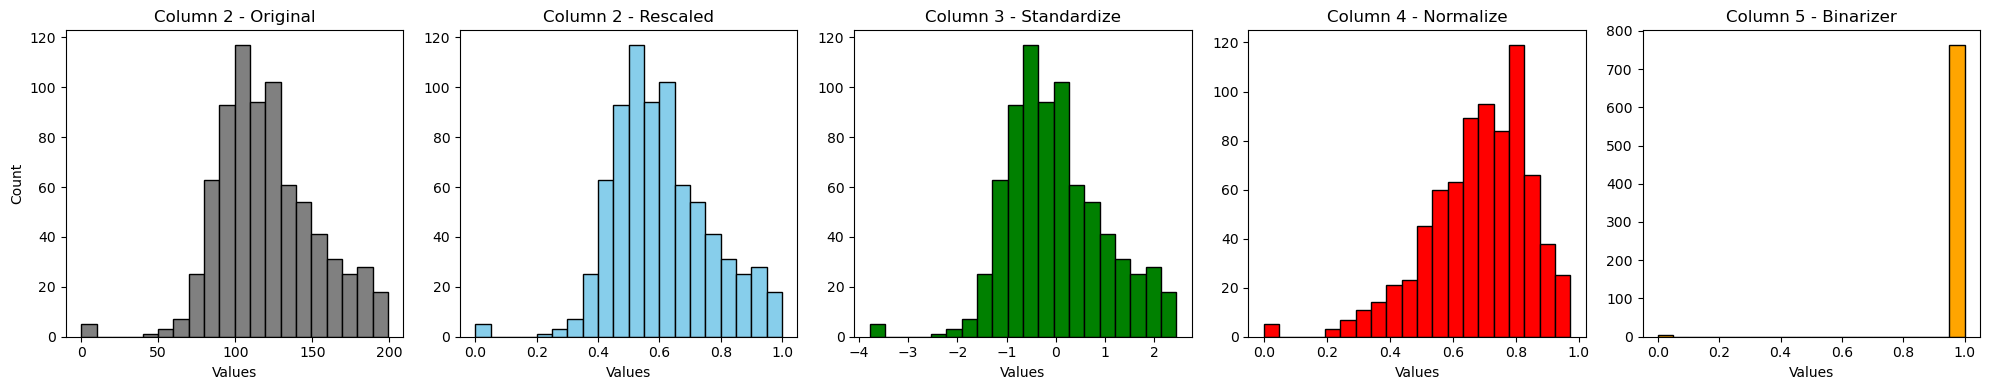

In [139]:
NUM_PLOTS = 5
BINS = 20
# Compared column
COL = 1

plt.figure(figsize=(20,4))

plt.subplot(1,NUM_PLOTS,1)
plt.hist(X[:, COL], bins=BINS, color="grey", edgecolor="black")
plt.title("Column 2 - Original")
plt.xlabel("Values")
plt.ylabel("Count")

plt.subplot(1,NUM_PLOTS,2)
plt.hist(X_rescaled[:, COL], bins=BINS, color="skyblue", edgecolor="black")
plt.title("Column 2 - Rescaled")
plt.xlabel("Values")

plt.subplot(1,NUM_PLOTS,3)
plt.hist(X_std[:, COL], bins=BINS, color="green", edgecolor="black")
plt.title("Column 3 - Standardize")
plt.xlabel("Values")

plt.subplot(1,NUM_PLOTS,4)
plt.hist(X_l2norm[:, COL], bins=BINS, color="red", edgecolor="black")
plt.title("Column 4 - Normalize")
plt.xlabel("Values")

plt.subplot(1,NUM_PLOTS,5)
plt.hist(X_binarizer[:, COL], bins=BINS, color="orange", edgecolor="black")
plt.title("Column 5 - Binarizer")
plt.xlabel("Values")

plt.tight_layout()
plt.show()


### **2.2.3 Discretization**
Convert continuous numeric values (price, age, weight) &rarr; discrete intervals

#### a. Unsupervised discretization

##### Equal-width (Uniform Binning): split [min, max] &rarr; *n* equal ranges

##### Equal-depth (Quantile binning): each bin has approximately same number of elements

##### Use K-mean clustering to determine border of each group

In [151]:
from sklearn.preprocessing import KBinsDiscretizer

# Discretization - Binning - Kmeans
# Create a new column 'BMI_kmeans_bin' in df
binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
# binner = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
# binner = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
data_no_missing['bmi_kmeans_bin'] = binner.fit_transform(data_no_missing[['bmi']])
data_no_missing[['bmi', 'bmi_kmeans_bin']].head(10)




/tmp/ipykernel_806481/579786746.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_missing['bmi_kmeans_bin'] = binner.fit_transform(data_no_missing[['bmi']])


,bmi,bmi_kmeans_bin
3,28.1000,0.0000
4,43.1000,2.0000
6,31.0000,1.0000
8,30.5000,1.0000
13,30.1000,1.0000
14,25.8000,0.0000
16,45.8000,2.0000
18,43.3000,2.0000
19,34.6000,1.0000
20,39.3000,2.0000


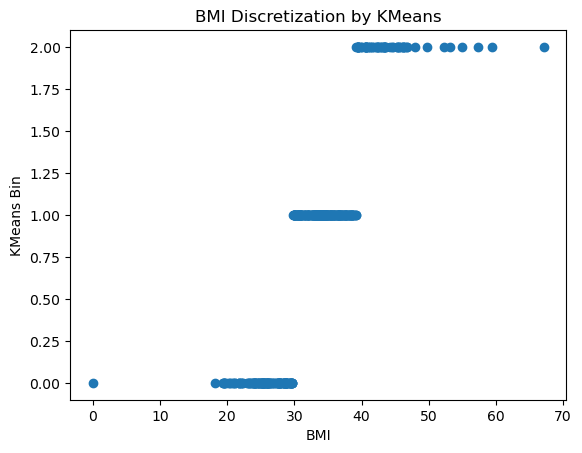

In [152]:
plt.scatter(data_no_missing['bmi'], data_no_missing['bmi_kmeans_bin'])
plt.xlabel('BMI')
plt.ylabel('KMeans Bin')
plt.title('BMI Discretization by KMeans')
plt.show()


#### b. Supervised discretization  

```
                ┌──────────────┐
                │     Feature Engineering  │
                └──────┬───────┘
       ┌─────────┼────────────┐
Feature Manipulation                 Feature Construction
(Chuẩn hóa, mã hóa,                   
rời rạc hóa, giảm chiều)          
                  │
 ┌─────┴─────┐
Feature Selection   Feature Extraction

```

# **3. Feature engineering**

- [Feature selection, PCA, Feature importance- ChatGPT](https://chatgpt.com/share/68e4e3bb-3270-800f-b332-3c7c1c35ad7e)

## **3.1 Feature selection**

### **3.1.2 Univariate selection - Chi square (Chi2)**

$$
\chi^2 = \sum \frac{(O - E)^2}{E}
$$

- Compare each features with output to select the n best features which have the strongest correlation with output

In [ ]:
# So long function
def select_KBest_chi2(X, Y, k_best=4):
    """
    Select K best features using Chi-square (Chi2) method

    - Input: 
        + X: feature set (numpy array or pandas DataFrame)
        + Y: target variable (numpy array or pandas Series)
        + k: number of top features to select (default is 4)
    - Output:
        + score: array of Chi2 scores for each feature
        + X_kbest: transformed feature set with only the top k features
    """
    # Create selectKBest object with chi2 function
    selector_chi2 = skl_f_select.SelectKBest(score_func=skl_f_select.chi2, k=k_best)
    # Fit data
    fit_selector_chi2 = selector_chi2.fit(X, Y)

    # Return scores and transformed X (only k best features)
    return fit_selector_chi2.scores_, selector_chi2.transform(X)
        

In [155]:
K_BEST = 4

# Create selectKBest object with chi2 function
selector_chi2 = skl_f_select.SelectKBest(score_func=skl_f_select.chi2, k=K_BEST)
# Fit data
fit_selector_chi2 = selector_chi2.fit(X, Y)
        

In [157]:
# Show scores
np.set_printoptions(precision=4)
print(fit_selector_chi2.scores_)

# Show columns which are selected
top_k_features_indices = selector_chi2.get_support(indices=True)
top_k = [names[i] for i in top_k_features_indices]
print("Top k features:", top_k)
X_kbest = selector_chi2.transform(X)
print(X_kbest[0:10, :])

[ 111.5197 1411.887    17.6054   53.108  2175.5653  127.6693    5.3927
  181.3037]
Top k features: ['gluc', 'insu', 'bmi', 'age']
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]
 [116.    0.   25.6  30. ]
 [ 78.   88.   31.   26. ]
 [115.    0.   35.3  29. ]
 [197.  543.   30.5  53. ]
 [125.    0.    0.   54. ]]


- Comment: 
    + After using Chi2 to select k=4 feature, we have 4 features which have the highest scores: ['gluc', 'insu', 'bmi', 'age']

### **3.1.3 Recursive Features Elimination - RFE**

- Recursively remove *'weak'* features until *k* features

## **3.2 Feature extraction**

## **3.3 Feature construction**

# **4a. Missing value**